### the main moto of this file is to reduce the number of features which cause the performance lagging of the machine learning model

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [371]:
df = pd.read_csv(r'D:\IMP  ML  PROJECTS\CAR PRICE PREDICTION\web scraping\MUMBAI\feature engineering\cleaned_car_data_2026_mumbai.csv')

In [372]:
df.columns

Index(['Registration Year', 'Insurance', 'Fuel Type', 'Seats', 'Kms Driven',
       'Ownership', 'Engine Displacement', 'Transmission', 'Drive Type',
       'Mileage', 'Engine Type', 'Max_Power_clean', 'Max_Power_RPM',
       'Max_Torque_Nm', 'Max_Torque_RPM', 'No. of Cylinders',
       'Valves Per Cylinder', 'Fuel Supply System', 'Turbo Charger',
       'Transmission Type', 'Gearbox', 'Petrol Mileage ARAI',
       'Petrol Fuel Tank Capacity', 'Emission Norm Compliance',
       'Front Suspension', 'Rear Suspension', 'Steering Type',
       'Steering Column', 'Front Brake Type', 'Rear Brake Type', 'Length',
       'Width', 'Height', 'Ground Clearance Unladen', 'Wheel Base',
       'Gross Weight', 'Price', 'Diesel Mileage ARAI',
       'Diesel Fuel Tank Capacity', 'Top Speed', 'Super Charge',
       'Battery Capacity', 'Charging Time DC', 'Charging Time AC',
       'Motor Type', 'Battery Type', 'Charging Port', 'Volume'],
      dtype='object')

In [373]:
df['Steering Type'].value_counts()

Steering Type
Power        3611
Electric     1039
Manual        303
Hydraulic      11
Name: count, dtype: int64

## Cleaning

---
####  Encoding Functions 

In [374]:
def clean_and_encode(df, column_name):
    # 1. Identify the category to be dropped (usually the first alphabetical one)
    dropped_category = sorted(df[column_name].unique())[0]
    
    # 2. Create the dummy variables
    # We use prefix='' and prefix_sep='' to keep names clean
    dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=True, dtype=int)
    
    # 3. Inform the user which one was dropped
    print(f"Dropped Category (Baseline): {dropped_category}")
    print(f"New Features Created: {list(dummies.columns)}")
    
    # 4. Remove old column and join new ones (as per your cleaning instructions)
    df = df.drop(column_name, axis=1)
    df = pd.concat([df, dummies], axis=1)
    
    return df

---

0. Drop Columns

In [375]:
# Drop the transmission feature
df.drop('Transmission', axis=1, inplace=True)

0. Steering Type

In [376]:
steering_map = {
    'Manual': 0,
    'Hydraulic': 1,
    'Power': 2,
    'Electric': 3
}
df['Steering Type'] = df['Steering Type'].map(steering_map)

1. Merging the dimensions into one column

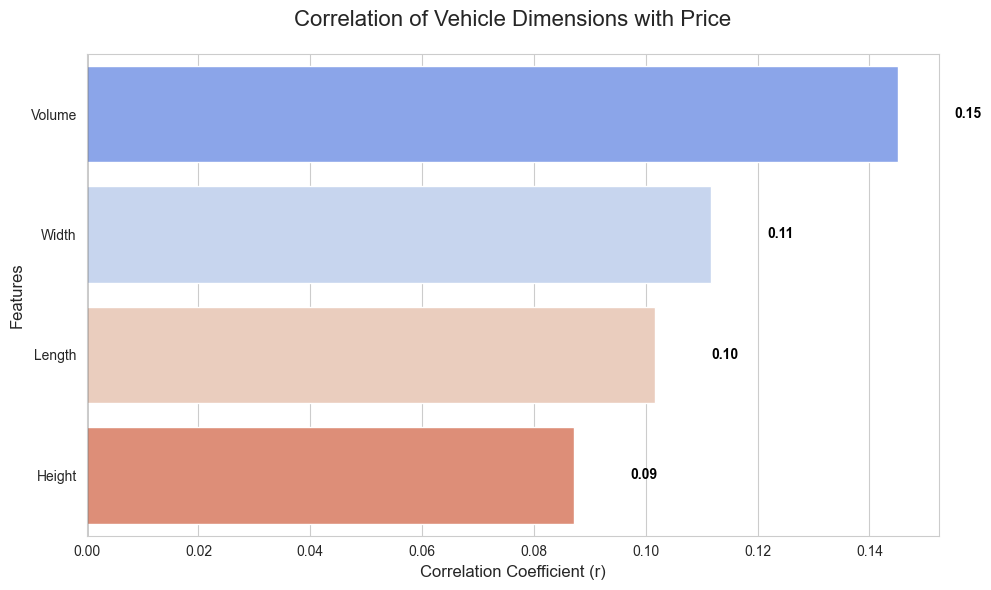

In [377]:
# Merge the ''Length', 'Width', 'Height' into one column called 'volumn'
df['Volume'] = df['Length'] * df['Width'] * df['Height']

cols_to_plot = ['Volume', 'Length', 'Width', 'Height']
correlations = df[cols_to_plot + ['Price']].corr()['Price'][cols_to_plot].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')

plt.title('Correlation of Vehicle Dimensions with Price', fontsize=16, pad=20)
plt.xlabel('Correlation Coefficient (r)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add a vertical line at 0 for clarity
plt.axvline(x=0, color='black', linewidth=1)

for i, v in enumerate(correlations.values):
    ax.text(v + 0.01 if v > 0 else v - 0.05, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [378]:
df.drop(['Length', 'Width', 'Height'], axis=1, inplace=True)

2. As we have the "Engine Displacement" feature so we can skip  the "No. of cylinder" feature as they are highly correlated 

In [379]:
df.drop("No. of Cylinders", axis=1, inplace=True)

3. Insurance

In [380]:
insurance_mapping = {
    'Unknown': 0,
    'Third Party': 1,
    'Comprehensive': 2,
    'Zero Dep': 3
}

# Apply the mapping to create the cleaned feature
df['Insurance'] = df['Insurance'].map(insurance_mapping)

4. Drive Type

In [381]:
df = clean_and_encode(df, 'Drive Type')

Dropped Category (Baseline): 2WD
New Features Created: ['Drive Type_4WD', 'Drive Type_AWD', 'Drive Type_FWD', 'Drive Type_RWD']


5. Engine Type

In [382]:
df = clean_and_encode(df, 'Engine Type')

Dropped Category (Baseline): In-Line
New Features Created: ['Engine Type_Standard', 'Engine Type_Standard Brand Engine', 'Engine Type_Turbocharged', 'Engine Type_V-Type']


6. Fuel Supply System

In [383]:
df = clean_and_encode(df, 'Fuel Supply System')

Dropped Category (Baseline): CRDi
New Features Created: ['Fuel Supply System_Direct Injection', 'Fuel Supply System_EFI', 'Fuel Supply System_MPFi', 'Fuel Supply System_Other']


7. Turbo Charger

In [384]:
turbo_map = {
    "Yes" : 1,
    "No" : 0
}

df['Turbo Charger'] = df['Turbo Charger'].map(turbo_map)

8. Transmission Type

In [385]:
transmission_mapping = {
    'Manual': 0,
    'Automatic': 1
}

df['Transmission Type'] = df['Transmission Type'].map(transmission_mapping)

9. Emission Norm Compliance

In [386]:
emission_mapping = {
    'BS III': 3,
    'BS IV': 4,
    'BS V': 5,
    'BS VI': 6,
    'BS VI 2.0': 7  # 2.0 is the most recent/advanced
}

# 2. Create the cleaned feature
df['Emission Norm Compliance'] = df['Emission Norm Compliance'].map(emission_mapping)

10. Front Suspension

In [387]:
df['Front Suspension'].value_counts()

Front Suspension
MacPherson Strut    4451
Standard/Other       322
Double Wishbone      169
Multi-Link            13
Independent            9
Name: count, dtype: int64

In [388]:
# Grouping to reduce cardinality
suspension_map = {
    'MacPherson Strut': 0,
    'Double Wishbone': 1,
    'Multi-Link': 1,
    'Standard/Other': 0,
    'Independent': 1
}

df['Front Suspension'] = df['Front Suspension'].map(suspension_map)

11. Rear Suspension

In [389]:
df['Rear Suspension'].value_counts()

Rear Suspension
Torsion/Twist Beam        3650
Standard/Other             790
Leaf Spring/Rigid Axle     393
Multi-Link                 100
Trailing Arm                25
Double Wishbone              6
Name: count, dtype: int64

In [390]:
suspension_map = {
    'Torsion/Twist Beam' : 0,
    'Standard/Other' : 2,
    'Trailing Arm' : 0,
    'Leaf Spring/Rigid Axle' : 2,
    'Multi-Link' : 1,   
    'Double Wishbone' : 1
}
df['Rear Suspension'] = df['Rear Suspension'].map(suspension_map)

12. Steering Type

In [391]:
df['Steering Type'].value_counts()

Steering Type
2    3611
3    1039
0     303
1      11
Name: count, dtype: int64

In [392]:
steering_map = {
    'Manual': 0,
    'Hydraulic': 1,
    'Power': 2,
    'Electric': 3
}
df['steering_type'] = df['Steering Type'].map(steering_map)

13. Steering Column

In [393]:
column_map = {
    'Fixed': 0,
    'Collapsible/Fixed': 0,
    'Tilt Only': 1,
    'Tilt and Telescopic': 2,
    'Power Adjustable': 3
}

# 2. Apply the mapping to create the cleaned feature
df['Steering Column'] = df['Steering Column'].map(column_map)

14. Front Brake Type

In [394]:
brake_map = {
    'Solid Disc': 0,
    'Other': 0,
    'Ventilated Disc': 1
}
df['Front Brake Type'] = df['Front Brake Type'].map(brake_map)

15. Rear Brake Type

In [395]:
rear_brake_map = {
    'Drum': 0,
    'Solid Disc': 1,
    'Ventilated Disc': 2
}
df['Rear Brake Type'] = df['Rear Brake Type'].map(rear_brake_map)

16. Top Speed

In [396]:
# 1. Convert to numeric, turning 'Unknown' into NaN (Not a Number)
df['Top Speed'] = pd.to_numeric(df['Top Speed'], errors='coerce')

# 2. Calculate the median of the known values
median_speed = df['Top Speed'].median()

# 3. Fill the 'Unknown' (NaN) values with the median
df['Top Speed'] = df['Top Speed'].fillna(median_speed)

# 4. Convert to integer type to save space and ensure consistency
df['Top Speed'] = df['Top Speed'].astype(int)

print(f"Handled 'Unknown' by imputing median: {int(median_speed)} km/h")

Handled 'Unknown' by imputing median: 165 km/h


<Axes: xlabel='Top Speed', ylabel='Density'>

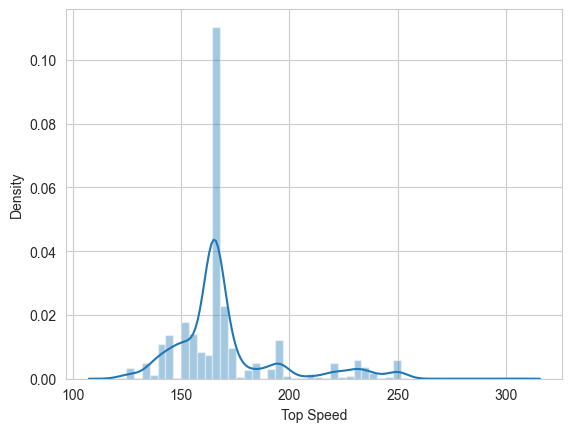

In [397]:
sns.distplot(df['Top Speed'])

17. Motor Type

In [398]:
motor_map = {
    'Not Applicable': 0,
    'PMSM (Permanent Magnet Synchronous Motor)': 1,
    'Mild Hybrid Motor': 1,
    'Other': 1
}

df['Motor Type'] = df['Motor Type'].map(motor_map)

18. Battery Type

In [399]:
battery_map = {
    'Not Applicable': 0,
    'Lithium-ion': 1,
    'Ni-MH': 1,
    'Blade Battery (LFP)': 1
}
df['Battery Type'] = df['Battery Type'].map(battery_map)

19. Charging Port

In [400]:
charging_map = {
    'CCS-II': 1,
    'CCS-I': 1
}
df['Charging Port'] = df['Charging Port'].map(charging_map).fillna(0).astype(int)

20. Gross Weight

In [401]:
df['Gross Weight'] = pd.to_numeric(df['Gross Weight'], errors='coerce')

# 2. To avoid bias, we fill 'Unknown' with the median 
median_weight = df['Gross Weight'].median()
df['Gross Weight_cleaned'] = df['Gross Weight'].fillna(median_speed)

# 3. Replace and rename as per your instructions
df = df.drop('Gross Weight', axis=1)
df = df.rename(columns={'Gross Weight_cleaned': 'Gross Weight'})

# 4. Final cast to int to save space
df['Gross Weight'] = df['Gross Weight'].astype(int)

---

In [402]:
# Split the df over the 'Fuel_Type' column and make new dfs

for i in df['Fuel Type'].unique():
    globals()[i] = df[df['Fuel Type'] == i]

    # print the result 
    print(globals()[i].head())
    print("\n")
    

   Registration Year  Insurance Fuel Type  Seats  Kms Driven  Ownership  \
0             2022.0          0    Petrol    5.0       30000          1   
2             2024.0          2    Petrol    7.0        8000          1   
3             2024.0          0    Petrol    7.0       20277          1   
4             2022.0          2    Petrol    5.0       20000          1   
5             2023.0          2    Petrol    5.0       27802          1   

   Engine Displacement  Mileage  Max_Power_clean  Max_Power_RPM  ...  \
0                  999    17.20           113.98         5500.0  ...   
2                 1451    12.34           141.04         5000.0  ...   
3                 1482    14.70           157.81         5500.0  ...   
4                  999    19.17            71.01         6250.0  ...   
5                 1497    17.70           113.42         6300.0  ...   

   Engine Type_Standard  Engine Type_Standard Brand Engine  \
0                     1                               

### <span style="color: yellow;">Working over the 'globals()['Petrol]" dataset</span>

In [403]:
globals()['Petrol'].columns
print("Number of columns initially : ", len(globals()['Petrol'].columns))

Number of columns initially :  53


In [404]:
del_cols = [
    'Diesel Mileage ARAI', 'Diesel Fuel Tank Capacity', 'Super Charge',
       'Battery Capacity', 'Charging Time DC', 'Charging Time AC',
       'Motor Type', 'Battery Type', 'Charging Port', 'Fuel Type', 'steering_type'
]

globals()['Petrol'] = globals()['Petrol'].drop(del_cols, axis=1)
print("Number of columns after cleaning : ", len(globals()['Petrol'].columns))

Number of columns after cleaning :  42


In [405]:
globals()['Petrol'].columns

Index(['Registration Year', 'Insurance', 'Seats', 'Kms Driven', 'Ownership',
       'Engine Displacement', 'Mileage', 'Max_Power_clean', 'Max_Power_RPM',
       'Max_Torque_Nm', 'Max_Torque_RPM', 'Valves Per Cylinder',
       'Turbo Charger', 'Transmission Type', 'Gearbox', 'Petrol Mileage ARAI',
       'Petrol Fuel Tank Capacity', 'Emission Norm Compliance',
       'Front Suspension', 'Rear Suspension', 'Steering Type',
       'Steering Column', 'Front Brake Type', 'Rear Brake Type',
       'Ground Clearance Unladen', 'Wheel Base', 'Price', 'Top Speed',
       'Volume', 'Drive Type_4WD', 'Drive Type_AWD', 'Drive Type_FWD',
       'Drive Type_RWD', 'Engine Type_Standard',
       'Engine Type_Standard Brand Engine', 'Engine Type_Turbocharged',
       'Engine Type_V-Type', 'Fuel Supply System_Direct Injection',
       'Fuel Supply System_EFI', 'Fuel Supply System_MPFi',
       'Fuel Supply System_Other', 'Gross Weight'],
      dtype='object')

In [406]:
# Save the df to a new csv file
globals()['Petrol'].to_csv('cleaned_car_data_Petrol.csv', index=False)

### <span style="color: yellow;">Working over the 'globals()['Diesel']" dataset</span>

In [407]:
del_cols = [
    'Petrol Mileage ARAI', 'Petrol Fuel Tank Capacity','Super Charge',
       'Battery Capacity', 'Charging Time DC', 'Charging Time AC',
       'Motor Type', 'Battery Type', 'Charging Port', 'Fuel Type', 'steering_type'
]
globals()['Diesel'] = globals()['Diesel'].drop(del_cols, axis=1)
print("Number of columns after cleaning : ", len(globals()['Diesel'].columns))

Number of columns after cleaning :  42


In [408]:
# Save the df to a new csv file
globals()['Diesel'].to_csv('cleaned_car_data_Diesel.csv', index=False)

### <span style="color: yellow;">Working over the 'globals()['CNG'] dataset</span>

In [409]:
del_cols = [
    'Battery Capacity', 'Charging Time DC', 'Charging Time AC', 
    'Motor Type', 'Battery Type', 'Charging Port',
    'Diesel Mileage ARAI', 'Diesel Fuel Tank Capacity', 
    'Petrol Mileage ARAI', 'Petrol Fuel Tank Capacity',
    'Super Charge', 'Turbo Charger', 'Fuel Supply System_Direct Injection', 
    'Fuel Supply System_EFI', 'Fuel Supply System_MPFi', 'Fuel Supply System_Other', 'steering_type'
]
globals()['CNG'] = globals()['CNG'].drop(del_cols, axis=1)
print("Number of columns after cleaning : ", len(globals()['CNG'].columns))

Number of columns after cleaning :  36


In [410]:
# Save the df to a new csv file
globals()['CNG'].to_csv('cleaned_car_data_CNG.csv', index=False)

### <span style="color: yellow;">Working over the 'globals()['Electric'] dataset</span>

In [411]:
globals()['Electric'].shape[0]

41

In [412]:
del_cols = [
    'Engine Displacement', 'Valves Per Cylinder', 
    'Engine Type_Standard', 'Engine Type_Standard Brand Engine', 
    'Engine Type_Turbocharged', 'Engine Type_V-Type',
    'Fuel Supply System_Direct Injection', 
    'Fuel Supply System_EFI', 'Fuel Supply System_MPFi', 
    'Fuel Supply System_Other', 'Turbo Charger', 'Super Charge',
    'Emission Norm Compliance', 'Petrol Fuel Tank Capacity', 
    'Diesel Fuel Tank Capacity', 'Petrol Mileage ARAI', 'Diesel Mileage ARAI', 'steering_type',
    'Gearbox'
]
globals()['Electric'] = globals()['Electric'].drop(del_cols, axis=1)
print(f"EV Data Cleaned! Remaining features: {len(globals()['Electric'].columns)}")

EV Data Cleaned! Remaining features: 34


In [413]:
# Save the df to a new csv file
globals()['Electric'].to_csv('cleaned_car_data_electric.csv', index=False)